In [91]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 
%matplotlib inline
from plotly.offline import init_notebook_mode, plot, iplot
import seaborn as sns

In [88]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [92]:
import cufflinks as cf
import chart_studio as cs

In [93]:
init_notebook_mode(connected=True)

In [94]:
cf.go_offline()

In [2]:
sns.set_theme(style="whitegrid")
sns.set_style("ticks")

In [3]:
df = pd.read_csv('./testepy.csv')
df

,Unnamed: 0,device_id,sampĺe_time,wind_speed,act_pow,exp_pow
0,0,758,2020-07-27 13:10:00,9.21789,1312.56,1819.270
1,1,158,2020-07-27 06:50:00,8.99733,1731.50,1780.470
2,2,758,2020-07-27 03:40:00,9.57135,1632.78,1982.800
3,3,158,2020-07-27 02:40:00,11.07600,2049.69,2088.970
4,4,758,2020-07-27 01:50:00,10.87280,1810.20,2254.970
...,...,...,...,...,...,...
283,283,158,2020-07-27 21:00:00,10.51200,2092.42,2064.750
284,284,758,2020-07-27 16:20:00,8.58201,1514.63,1547.020
285,285,758,2020-07-27 17:30:00,8.44030,1353.94,1487.310
286,286,758,2020-07-27 08:10:00,13.15330,1902.66,2300.000


In [4]:
variable = df["wind_speed"]
variable

0       9.21789
1       8.99733
2       9.57135
3      11.07600
4      10.87280
         ...   
283    10.51200
284     8.58201
285     8.44030
286    13.15330
287     6.68701
Name: wind_speed, Length: 288, dtype: float64

In [5]:
device_id = df["device_id"]
device_id

0      758
1      158
2      758
3      158
4      758
      ... 
283    158
284    758
285    758
286    758
287    758
Name: device_id, Length: 288, dtype: int64

In [6]:
orden = df.sort_values(by=['sampĺe_time'])
start_time = orden.loc[72, "sampĺe_time"]
end_time = orden.loc[184, "sampĺe_time"]
time = orden["sampĺe_time"]
orden


,Unnamed: 0,device_id,sampĺe_time,wind_speed,act_pow,exp_pow
72,72,758,2020-07-27 00:10:00,9.12913,1656.40,1804.02
50,50,158,2020-07-27 00:10:00,10.89400,2096.66,2083.21
218,218,758,2020-07-27 00:20:00,9.35896,1652.15,1898.93
192,192,158,2020-07-27 00:20:00,10.70270,2116.23,2073.96
174,174,758,2020-07-27 00:30:00,10.02230,1832.44,2107.68
...,...,...,...,...,...,...
256,256,758,2020-07-27 23:40:00,10.03590,1672.03,2109.75
39,39,758,2020-07-27 23:50:00,9.93656,1706.25,2083.99
95,95,158,2020-07-27 23:50:00,9.98800,1945.88,2036.90
252,252,758,2020-07-28 00:00:00,9.45444,1559.98,1938.21


In [7]:
end_time

'2020-07-28 00:00:00'

In [8]:
start_time


'2020-07-27 00:10:00'

In [9]:
time


72     2020-07-27 00:10:00
50     2020-07-27 00:10:00
218    2020-07-27 00:20:00
192    2020-07-27 00:20:00
174    2020-07-27 00:30:00
              ...         
256    2020-07-27 23:40:00
39     2020-07-27 23:50:00
95     2020-07-27 23:50:00
252    2020-07-28 00:00:00
184    2020-07-28 00:00:00
Name: sampĺe_time, Length: 288, dtype: object

Text(0.5, 1.0, 'Time Series')

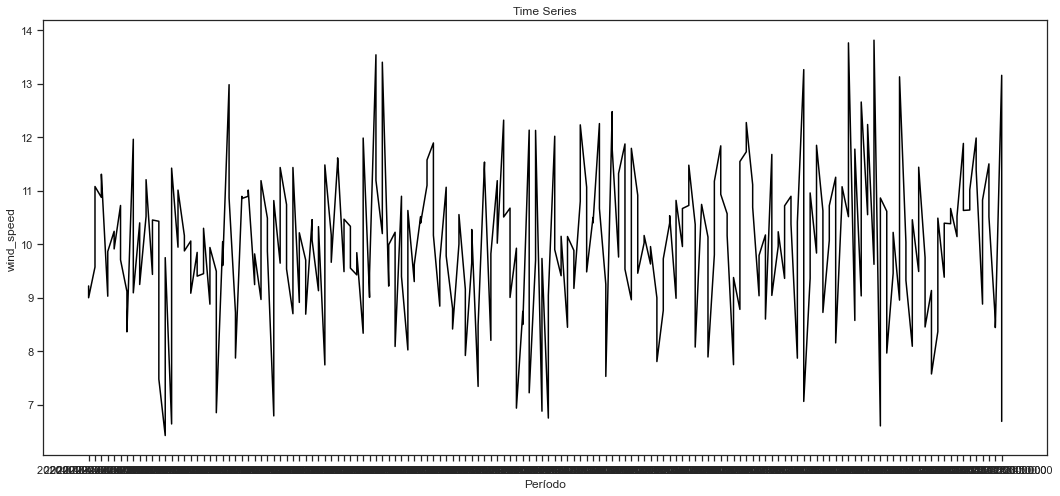

In [10]:
plt.figure(figsize=(18, 8)) 
plt.plot(time, variable, color='black');
plt.xlabel("Período")
plt.ylabel("wind_speed")
plt.title("Time Series")

<AxesSubplot:xlabel='sampĺe_time', ylabel='act_pow'>

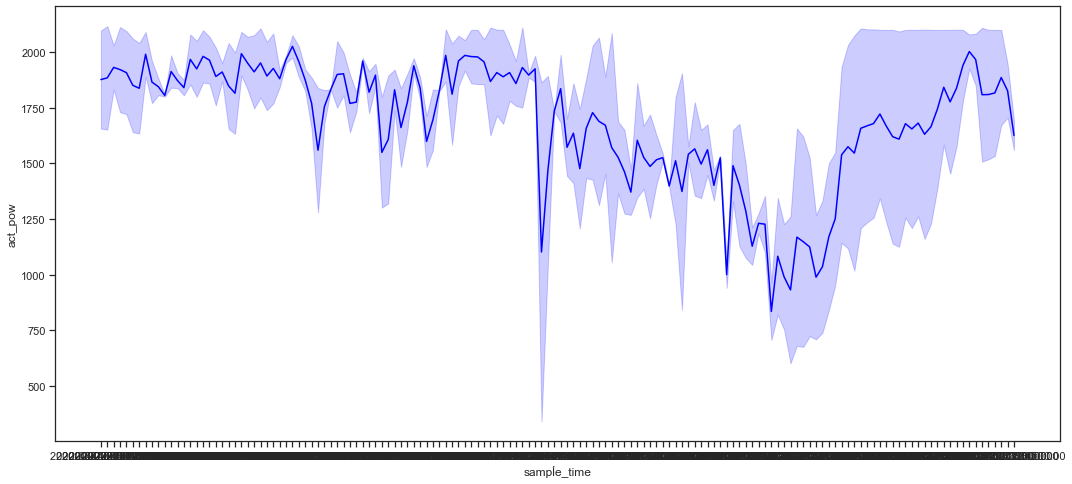

In [11]:
plt.figure(figsize=(18, 8)) 
sns.lineplot(data=orden , y="act_pow", x="sampĺe_time", color="blue")

<AxesSubplot:xlabel='sampĺe_time', ylabel='exp_pow'>

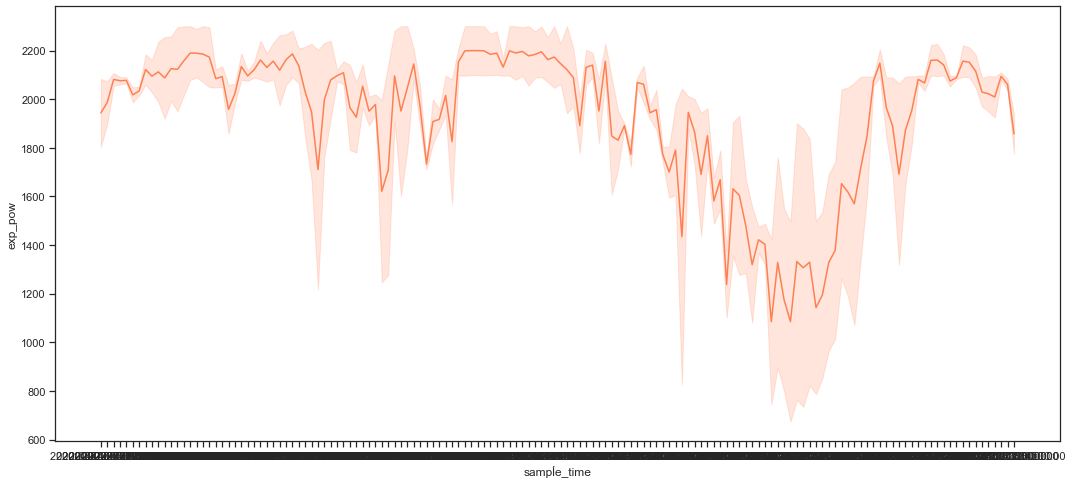

In [12]:
plt.figure(figsize=(18, 8)) 
sns.lineplot(data=orden , y="exp_pow", x="sampĺe_time", color="coral")

In [19]:
pot = pd.DataFrame(orden, columns=['sampĺe_time','act_pow','exp_pow'])
periodo = orden["sampĺe_time"]
pot.set_index('sampĺe_time', inplace = True)
pot

,act_pow,exp_pow
sampĺe_time,,
2020-07-27 00:10:00,1656.40,1804.02
2020-07-27 00:10:00,2096.66,2083.21
2020-07-27 00:20:00,1652.15,1898.93
2020-07-27 00:20:00,2116.23,2073.96
2020-07-27 00:30:00,1832.44,2107.68
...,...,...
2020-07-27 23:40:00,1672.03,2109.75
2020-07-27 23:50:00,1706.25,2083.99
2020-07-27 23:50:00,1945.88,2036.90


Text(0.5, 1.0, 'Gráfico das energias')

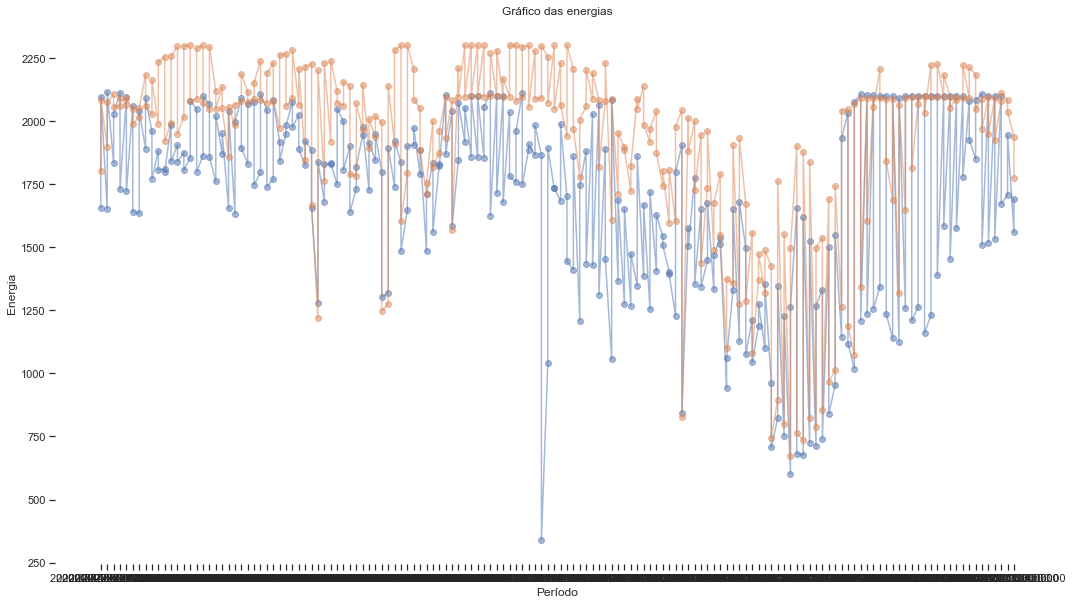

In [27]:
plt.figure(figsize=(18, 10)) 
plt.plot(potencia,marker="o", alpha=0.5)
sns.despine(left=True, bottom=True)
plt.xlabel("Período")
plt.ylabel("Energia")
plt.title("Gráfico das energias")

In [14]:
diferença = orden["exp_pow"] - orden["act_pow"]
diferença

72     147.62
50     -13.45
218    246.78
192    -42.27
174    275.24
        ...  
256    437.72
39     377.74
95      91.02
252    378.23
184     84.99
Length: 288, dtype: float64

Text(0.5, 1.0, 'Diferença das energias')

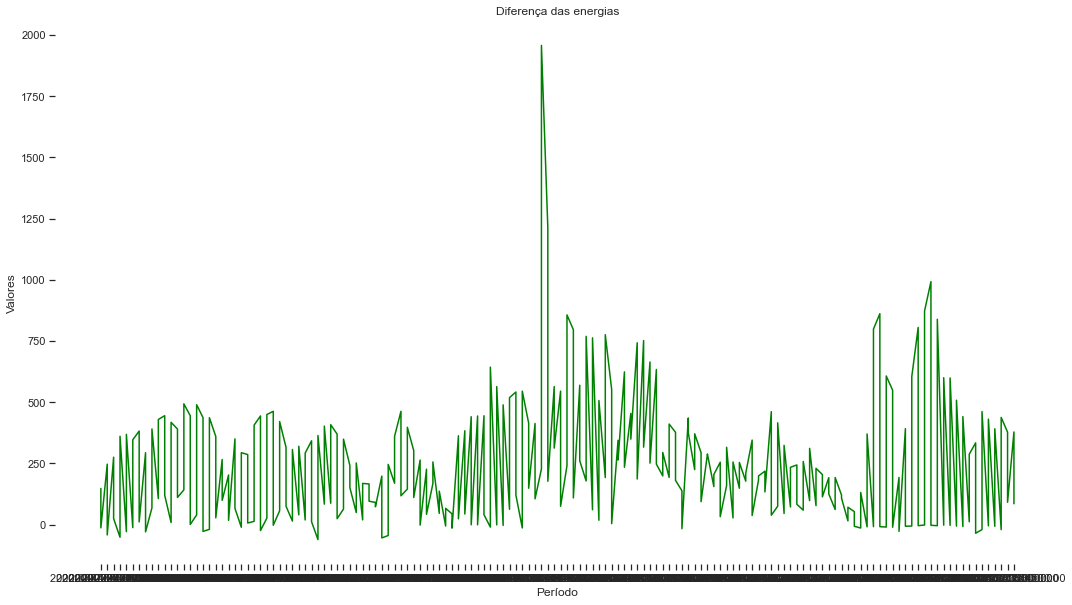

In [31]:
plt.figure(figsize=(18, 10)) 
plt.plot(periodo,diferença, color="green")
sns.despine(left=True, bottom=True)
plt.xlabel("Período")
plt.ylabel("Valores")
plt.title("Diferença das energias")

In [95]:
pot[['exp_pow','act_pow']].iplot(kind='spread')